In [92]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [93]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [94]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [95]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [96]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [97]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [98]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [99]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [100]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [101]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.3,random_state=123)
X_train.shape, X_test.shape

((560178, 19), (240077, 19))

``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [103]:
# Target encoder
import category_encoders as ce
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(X_train, X_train['MIS_Status'])

train_encoded = encoder.transform(X_train)
test_encoded = encoder.transform(X_test)

# Renaming the columns
train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
test_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in test_encoded.columns}, inplace=False)

train_encoded.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,2,0.17067,2,2,0,0.186517,0.152625,0.186815,12500.0,0.0,12500.0,10625.0,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,7,0.17067,0,0,0,0.243731,0.152625,0.186815,20000.0,0.0,20000.0,10000.0,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,3,0.17067,0,0,1,0.070886,0.152625,0.089154,25000.0,0.0,25000.0,20000.0,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,12,0.17067,12,12,1,0.243731,0.251879,0.186815,985500.0,0.0,350000.0,175000.0,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,1,0.17067,0,1,0,0.243731,0.152625,0.186815,50000.0,0.0,50000.0,25000.0,0


StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing

In [104]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])

train_encoded.head()


,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
148172,0.215946,0.165802,45648,0.740692,0.217642,452990,-0.123748,0.17067,-0.026808,-0.036871,0,0.186517,0.152625,0.186815,-0.654946,-0.002095,-0.635102,-0.606817,1
744579,0.226933,0.165802,43240,0.133135,0.158188,445310,-0.058247,0.17067,-0.035352,-0.045405,0,0.243731,0.152625,0.186815,-0.628851,-0.002095,-0.608622,-0.609553,0
321200,0.252778,0.196143,21037,0.194430,0.076619,0,-0.110648,0.17067,-0.035352,-0.045405,1,0.070886,0.152625,0.089154,-0.611454,-0.002095,-0.590969,-0.565780,0
74901,0.275938,0.184227,90071,0.141177,0.178801,541310,0.007255,0.17067,0.015917,0.005801,1,0.243731,0.251879,0.186815,2.730474,-0.002095,0.556485,0.112702,1
426895,0.057056,0.184227,95037,0.412096,0.380604,561720,-0.136849,0.17067,-0.035352,-0.041138,0,0.243731,0.152625,0.186815,-0.524470,-0.002095,-0.502703,-0.543894,0


We have created Feature extraction by making use of old variables in the following way


(1) Log_Disbursement which gives the natural logarithmic form of DisbursementGross variable

(2) Log_GrAppv the logarithmic version of the approved loan amount by the bank

(3) Log_SBA_Appv, the logarithmic amount of the approved loan that will be assisted by SBA 

(4) Log_BalanceGross, is the logarithmic amount of total amount in an account or the total value of a financial asset or liability before any deductions or adjustments are made.

(5) TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

(6) IncomeToLoan its values are calculated by dividing the 'DisbursementGross' column by the 'SBA_Appv' column for each corresponding row. This ratio can help you analyze the relationship between the amount disbursed and the approved SBA loan amount in terms of income.

(7)  EmployeesToLoanRatio, its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.

(8) JobPerLoan, its values are calculated by dividing the 'TotalJobs' column (representing the total number of jobs) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the impact of the SBA loan on job creation or support, expressed as the number of jobs per unit of loan amount approved.

(9) Gauren_SBA_Appv, Its values are calculated by dividing the 'GrAppv' column (gross amount approved by the lender) by the 'SBA_Appv' column (the approved SBA loan amount) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.

(10) DefaultRate, Finally, we create a new feature 'DefaultRate' in the 'train_encoded' DataFrame and set its value to the calculated default rate for the particular group of loans based on the "MIS_Status" variable. This feature will represent the percentage of loans in the group that are classified as defaults.

In [105]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = train_encoded[train_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
train_encoded['DefaultRate'] = default_rate

In [106]:
# Adding Features
import numpy as np
# Apply the log transformation to the specific feature in your training data
#small_constant = 1e-10  # You can adjust this constant as needed
# df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])
test_encoded['TotalJobs'] = test_encoded['CreateJob'] + test_encoded['RetainedJob']
#train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
# Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
test_encoded['IncomeToLoanRatio'] = test_encoded['DisbursementGross'] / test_encoded['SBA_Appv']
# Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
test_encoded['EmployeesToLoanRatio'] = test_encoded['NoEmp'] / test_encoded['SBA_Appv']
# Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
#train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
# Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
test_encoded['JobPerLoan'] = test_encoded['TotalJobs'] / test_encoded['SBA_Appv'] 
# Calculate SBA's Gaurenteed Portion of Approved Loan
test_encoded['Gauren_SBA_Appv'] = test_encoded['GrAppv'] / test_encoded['SBA_Appv']
# Filter the DataFrame to include only the relevant rows
default_group = test_encoded[test_encoded['MIS_Status'].isin([0, 1])]
# Calculate the total number of loans in the filtered group
total_loans = len(default_group)
# Calculate the number of defaults (CHGOFF) in the filtered group
default_loans = len(default_group[default_group['MIS_Status'] == 1])
# Calculate the default rate as a percentage
default_rate = (default_loans / total_loans) * 100
# Create a new feature 'DefaultRate' with the calculated default rate
test_encoded['DefaultRate'] = default_rate

In [107]:
train_encoded.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'MIS_Status', 'Log_DisbursementGross', 'Log_GrAppv',
       'Log_SBA_Appv', 'Log_BalanceGross', 'TotalJobs', 'IncomeToLoanRatio',
       'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv', 'DefaultRate'],
      dtype='object')

In [108]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [109]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)


In [110]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [111]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8205511277259651
AUC score on Train dataset: 0.8468756526040521


In [112]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

[I 2023-12-09 17:44:10,878] A new study created in memory with name: LGBM Classifier
[I 2023-12-09 17:44:10,967] Trial 0 finished with value: 0.5 and parameters: {'learning_rate': 0.4159422321720808, 'num_leaves': 140, 'max_depth': 16, 'min_data_in_leaf': 500, 'lambda_l1': 8.337253901605823, 'lambda_l2': 0.11599914132358986, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-09 17:44:11,036] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.21311239488793698, 'num_leaves': 540, 'max_depth': 12, 'min_data_in_leaf': 900, 'lambda_l1': 6.715254808892487, 'lambda_l2': 4.3261788952465645, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 17:44:11,108] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 0.15212876102917414, 'num_leaves': 560, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 0.2253434068384779, 'lambda_l2': 0.3159551322281933, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-09 17:44:11,192] Trial 3 finished with value: 0.6814861753119272 and parameters: {'learning_rate': 0.31683371060241317, 'num_leaves': 480, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 0.1302124779062171, 'lambda_l2': 0.8594025464635453, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 3 with value: 0.6814861753119272.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.70975
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.680235
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.66294
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.647188
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.707317
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.736196
Training until validatio

[I 2023-12-09 17:44:11,277] Trial 4 finished with value: 0.6869924933911916 and parameters: {'learning_rate': 0.7002222139366404, 'num_leaves': 340, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 2.480652597861626, 'lambda_l2': 2.589354731237948, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 4 with value: 0.6869924933911916.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.646341
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.708503


[I 2023-12-09 17:44:11,346] Trial 5 finished with value: 0.5 and parameters: {'learning_rate': 0.2226509475139304, 'num_leaves': 520, 'max_depth': 14, 'min_data_in_leaf': 800, 'lambda_l1': 0.3489778131969122, 'lambda_l2': 2.9552732328923996, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 4 with value: 0.6869924933911916.
[I 2023-12-09 17:44:11,365] Trial 6 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:11,429] Trial 7 finished with value: 0.5 and parameters: {'learning_rate': 0.4062435059436535, 'num_leaves': 270, 'max_depth': 10, 'min_data_in_leaf': 400, 'lambda_l1': 2.1074126232149566, 'lambda_l2': 1.4487771320414347, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 4 with value: 0.6869924933911916.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 

[I 2023-12-09 17:44:11,490] Trial 8 finished with value: 0.5 and parameters: {'learning_rate': 0.46853605032991813, 'num_leaves': 430, 'max_depth': 16, 'min_data_in_leaf': 900, 'lambda_l1': 0.14343424133543964, 'lambda_l2': 3.291771859953908, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 4 with value: 0.6869924933911916.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 17:44:11,548] Trial 9 finished with value: 0.5 and parameters: {'learning_rate': 0.414679055664754, 'num_leaves': 360, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.3663047833680882, 'lambda_l2': 0.18686682118333403, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 4 with value: 0.6869924933911916.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.752197
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:11,689] Trial 10 finished with value: 0.7355537772547349 and parameters: {'learning_rate': 0.7719794647824458, 'num_leaves': 80, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0036952390587046, 'lambda_l2': 9.563907496314261, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.


Early stopping, best iteration is:
[24]	valid_0's auc: 0.743492
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.740854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.774898


[I 2023-12-09 17:44:11,819] Trial 11 finished with value: 0.7259360428436816 and parameters: {'learning_rate': 0.7887072149009938, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1045047293076822, 'lambda_l2': 9.235773337267966, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.752197
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.734953
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.741362
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.734841


[I 2023-12-09 17:44:11,946] Trial 12 finished with value: 0.7312341491948331 and parameters: {'learning_rate': 0.7663192939088661, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.8141251377776658, 'lambda_l2': 9.620654070198952, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.752529
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.731471
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.740346
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765498
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.76911
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.736528
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.677761
Training until 

[I 2023-12-09 17:44:12,078] Trial 13 finished with value: 0.7336478330792262 and parameters: {'learning_rate': 0.6210464552321859, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.906367796170941, 'lambda_l2': 9.817644191246373, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.
[I 2023-12-09 17:44:12,192] Trial 14 finished with value: 0.5 and parameters: {'learning_rate': 0.5704822253118632, 'num_leaves': 170, 'max_depth': 12, 'min_data_in_leaf': 700, 'lambda_l1': 0.7708020367235887, 'lambda_l2': 6.799491450053521, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-09 17:44:12,317] Trial 15 finished with value: 0.5 and parameters: {'learning_rate': 0.569886513680436, 'num_leaves': 120, 'max_depth': 14, 'min_data_in_leaf': 600, 'lambda_l1': 1.2789460162063218, 'lambda_l2': 5.6426073551464855, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 10 with value: 0.7355537772547349.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.781462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.71945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't im

[I 2023-12-09 17:44:12,470] Trial 16 finished with value: 0.739901225668284 and parameters: {'learning_rate': 0.5819005053029925, 'num_leaves': 240, 'max_depth': 10, 'min_data_in_leaf': 100, 'lambda_l1': 0.547264854880957, 'lambda_l2': 5.190049843701457, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:12,536] Trial 17 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.783875
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:12,602] Trial 18 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:12,670] Trial 19 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:12,781] Trial 20 finished with value: 0.5 and parameters: {'learning_rate': 0.5009264641864816, 'num_leaves': 250, 'max_depth': 10, 'min_data_in_leaf': 500, 'lambda_l1': 0.23889688824179592, 'lambda_l2': 6.959208083277091, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.774581
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:12,926] Trial 21 finished with value: 0.7333231639914641 and parameters: {'learning_rate': 0.6475121255800639, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7488018382660132, 'lambda_l2': 9.65455085824745, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.731719
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.674373
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.739499
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.746443
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.763223
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.667514
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.765075


[I 2023-12-09 17:44:13,084] Trial 22 finished with value: 0.7364541445530521 and parameters: {'learning_rate': 0.6501922737665328, 'num_leaves': 190, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.4250327557052107, 'lambda_l2': 6.541220174308849, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:13,158] Trial 23 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.750678
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.733378
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.677761
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.730098


[I 2023-12-09 17:44:13,309] Trial 24 finished with value: 0.7366318988073814 and parameters: {'learning_rate': 0.5052768929420225, 'num_leaves': 320, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.6285256050574428, 'lambda_l2': 3.787959348602084, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:13,376] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:13,446] Trial 26 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.774306
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:13,517] Trial 27 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:13,584] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:13,648] Trial 29 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:13,806] Trial 30 finished with value: 0.7334126716122078 and parameters: {'learning_rate': 0.4861131368384128, 'num_leaves': 410, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.6245474370417692, 'lambda_l2': 4.674559857777926, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.762726
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.738518
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.749492
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.75
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.761151
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.738352
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328


[I 2023-12-09 17:44:13,961] Trial 31 finished with value: 0.7299140641464449 and parameters: {'learning_rate': 0.6858810628364994, 'num_leaves': 210, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.047751210612493, 'lambda_l2': 7.128180373189481, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:14,030] Trial 32 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.739837
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.743902
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.773338
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.729481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.666328
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:14,172] Trial 33 finished with value: 0.7386904477049248 and parameters: {'learning_rate': 0.7163072041419677, 'num_leaves': 130, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7581941949899205, 'lambda_l2': 5.218596024020236, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:14,242] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:14,312] Trial 35 pruned. Trial was pruned at iteration 1.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.740176
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.784129
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:14,459] Trial 36 finished with value: 0.7376465665875362 and parameters: {'learning_rate': 0.37075100875069733, 'num_leaves': 170, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.1832392719318756, 'lambda_l2': 5.139253881387242, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 16 with value: 0.739901225668284.
[I 2023-12-09 17:44:14,530] Trial 37 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.764218
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.725336
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.697663
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.740261
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.760755


[I 2023-12-09 17:44:14,601] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:14,677] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:14,746] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:14,898] Trial 41 finished with value: 0.7398238448683608 and parameters: {'learning_rate': 0.4451849234235784, 'num_leaves': 190, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.5043041932809351, 'lambda_l2': 5.1114482555385345, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 16 with value: 0.739901225668284.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767452
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735699
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.713923
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.740176
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.74187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.787929
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735699
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.692497


[I 2023-12-09 17:44:15,052] Trial 42 finished with value: 0.7477133893582345 and parameters: {'learning_rate': 0.4425093600694926, 'num_leaves': 130, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.513172318325588, 'lambda_l2': 5.008801583469864, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 42 with value: 0.7477133893582345.
[I 2023-12-09 17:44:15,126] Trial 43 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.739499
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.782944
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.758995
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:15,286] Trial 44 pruned. Trial was pruned at iteration 21.
[I 2023-12-09 17:44:15,360] Trial 45 pruned. Trial was pruned at iteration 0.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.734372
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.693682
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.765462


[I 2023-12-09 17:44:15,505] Trial 46 finished with value: 0.7379968991511336 and parameters: {'learning_rate': 0.40921651662206593, 'num_leaves': 60, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.056834759554089, 'lambda_l2': 7.733840877742786, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 42 with value: 0.7477133893582345.
[I 2023-12-09 17:44:15,579] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:15,651] Trial 48 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.733212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.689024
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.740515
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.761772
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:15,800] Trial 49 finished with value: 0.7466946493478366 and parameters: {'learning_rate': 0.5445848740540677, 'num_leaves': 50, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.148682702448289, 'lambda_l2': 6.069790851636736, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 42 with value: 0.7477133893582345.
[I 2023-12-09 17:44:15,873] Trial 50 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.764301
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.744155
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.706301
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73501
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.783706
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:16,026] Trial 51 finished with value: 0.7482355953140034 and parameters: {'learning_rate': 0.5843524193491376, 'num_leaves': 40, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.8351723186376971, 'lambda_l2': 8.250802832048926, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 51 with value: 0.7482355953140034.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.772592
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.759576
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.704946
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73501
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.769055
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.783618
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.759327
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.701643
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:16,176] Trial 52 finished with value: 0.7504927510931552 and parameters: {'learning_rate': 0.6066867993218098, 'num_leaves': 50, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7813651180884682, 'lambda_l2': 5.85802527481579, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 52 with value: 0.7504927510931552.
[I 2023-12-09 17:44:16,252] Trial 53 pruned. Trial was pruned at iteration 0.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.739075
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.768801
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.741917
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.706301


[I 2023-12-09 17:44:16,400] Trial 54 finished with value: 0.7456049317685185 and parameters: {'learning_rate': 0.5267357378588182, 'num_leaves': 90, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.8837273936689778, 'lambda_l2': 6.055498723438691, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 52 with value: 0.7504927510931552.
[I 2023-12-09 17:44:16,544] Trial 55 finished with value: 0.7465209925996623 and parameters: {'learning_rate': 0.5258650476189397, 'num_leaves': 30, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.8232959951445572, 'lambda_l2': 6.303123051697338, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 52 with value: 0.7504927510931552.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.742039
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.769902
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767534
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.741917
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.706301
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73501
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.781843


[I 2023-12-09 17:44:16,707] Trial 56 finished with value: 0.7433620259867828 and parameters: {'learning_rate': 0.5080309719998684, 'num_leaves': 20, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 0.8972526241692219, 'lambda_l2': 5.924233955063523, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 52 with value: 0.7504927510931552.
[I 2023-12-09 17:44:16,782] Trial 57 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.770187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.741254
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.692327
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.742039
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.771003


[I 2023-12-09 17:44:16,859] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:16,947] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:17,023] Trial 60 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:17,097] Trial 61 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:17,248] Trial 62 finished with value: 0.7463466056584791 and parameters: {'learning_rate': 0.4762242465887192, 'num_leaves': 20, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.109924145727587, 'lambda_l2': 6.439566155772161, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 52 with value: 0.7504927510931552.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.784447
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.741917
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.714939
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.738906
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.751524


[I 2023-12-09 17:44:17,401] Trial 63 finished with value: 0.7533067183598382 and parameters: {'learning_rate': 0.5819149392221915, 'num_leaves': 60, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.3532122787141645, 'lambda_l2': 8.61838167721639, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.
[I 2023-12-09 17:44:17,479] Trial 64 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.785774
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.76057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.736873
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.778201
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:17,557] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:17,632] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:17,705] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:17,782] Trial 68 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:17,933] Trial 69 finished with value: 0.7473682243143938 and parameters: {'learning_rate': 0.6702029229466332, 'num_leaves': 150, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.9101185258674005, 'lambda_l2': 3.738641176926782, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.776737
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.740507
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.706386
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.72815
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.785061


[I 2023-12-09 17:44:18,010] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:18,101] Trial 71 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:18,247] Trial 72 finished with value: 0.7375517088987836 and parameters: {'learning_rate': 0.5773844980051951, 'num_leaves': 80, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.2642800507118703, 'lambda_l2': 6.8470435164127545, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.765296
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.730559
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.710451
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.723154
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.758299


[I 2023-12-09 17:44:18,405] Trial 73 finished with value: 0.737342385030549 and parameters: {'learning_rate': 0.796870871817195, 'num_leaves': 30, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.470329102751093, 'lambda_l2': 4.622538226603242, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.776322
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.728818
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.7323
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.750762
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.77541
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.7677
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.701812


[I 2023-12-09 17:44:18,556] Trial 74 finished with value: 0.7528463737941143 and parameters: {'learning_rate': 0.6207050925527615, 'num_leaves': 60, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.9155210112563754, 'lambda_l2': 7.857366090598537, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.
[I 2023-12-09 17:44:18,642] Trial 75 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.738144
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.781165
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.772094
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279


[I 2023-12-09 17:44:18,798] Trial 76 finished with value: 0.7464748163171402 and parameters: {'learning_rate': 0.7043607780895386, 'num_leaves': 140, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.8240918992724366, 'lambda_l2': 5.6169276709847695, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 63 with value: 0.7533067183598382.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.745681
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.773205
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.772675
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.768695
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.71748
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.739075
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.77727


[I 2023-12-09 17:44:18,948] Trial 77 finished with value: 0.7550388232389206 and parameters: {'learning_rate': 0.6452533030596334, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.6508851901599346, 'lambda_l2': 7.329335914723155, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:19,028] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:19,103] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:19,256] Trial 80 finished with value: 0.7529654766992041 and parameters: {'learning_rate': 0.6553569222790862, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.3730669805851676, 'lambda_l2': 4.815835091402333, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794727
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.744321
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.758469
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.770833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.784944
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.771928
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.697324
Training until 

[I 2023-12-09 17:44:19,412] Trial 81 finished with value: 0.7525331013341636 and parameters: {'learning_rate': 0.6346311458074102, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.4080893335941893, 'lambda_l2': 4.877995081795321, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:19,563] Trial 82 finished with value: 0.7477278219039031 and parameters: {'learning_rate': 0.6330314981154535, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.4395255145937906, 'lambda_l2': 3.5696438606000993, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.794064
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73802
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.690295
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.745935
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.770325


[I 2023-12-09 17:44:19,722] Trial 83 finished with value: 0.7513776074068981 and parameters: {'learning_rate': 0.6352916285571887, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.4646003287495166, 'lambda_l2': 5.119911658830538, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.779473
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.766457
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.695969
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.747205
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767785
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.785276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.771928


[I 2023-12-09 17:44:19,892] Trial 84 finished with value: 0.7525994253268681 and parameters: {'learning_rate': 0.6321111072611474, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.3840113922276214, 'lambda_l2': 4.768373494147815, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:19,979] Trial 85 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.697493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.767107


[I 2023-12-09 17:44:20,070] Trial 86 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.770768
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.767866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.701812
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.738144
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.767615


[I 2023-12-09 17:44:20,244] Trial 87 finished with value: 0.7492409727923345 and parameters: {'learning_rate': 0.6347163652471051, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.026734108247553, 'lambda_l2': 8.982071203010829, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:20,332] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:20,415] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:20,509] Trial 90 pruned. Trial was pruned at iteration 5.
[I 2023-12-09 17:44:20,676] Trial 91 finished with value: 0.748878861653813 and parameters: {'learning_rate': 0.6102945887761044, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.7256805689332106, 'lambda_l2': 8.76953629475326, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with va

Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.781628
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.758498
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.698509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.734163
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.771596


[I 2023-12-09 17:44:20,847] Trial 92 finished with value: 0.7493589972585184 and parameters: {'learning_rate': 0.6270618421295916, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5919703356141173, 'lambda_l2': 8.892081723490424, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:20,937] Trial 93 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.775825
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.766871
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.701812
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.734163
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.768123


[I 2023-12-09 17:44:21,108] Trial 94 finished with value: 0.7523956593508068 and parameters: {'learning_rate': 0.6363767692128106, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.375015779069736, 'lambda_l2': 7.6932458473621335, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.769275
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.768363
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.71748
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.739075
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.767785
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.797049
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.707486


[I 2023-12-09 17:44:21,287] Trial 95 finished with value: 0.7542942875540511 and parameters: {'learning_rate': 0.6855915947312575, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.3996265021490077, 'lambda_l2': 7.652903866391132, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 77 with value: 0.7550388232389206.
[I 2023-12-09 17:44:21,373] Trial 96 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.776762
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:21,549] Trial 97 finished with value: 0.7574494964813685 and parameters: {'learning_rate': 0.6726653665151793, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2370669791258075, 'lambda_l2': 7.6858777928943045, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[7]	valid_0's auc: 0.766125
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.777898
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.707486
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.754065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.781673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.78196
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73802


[I 2023-12-09 17:44:21,715] Trial 98 finished with value: 0.745730437904611 and parameters: {'learning_rate': 0.6682658974835363, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2252202660218052, 'lambda_l2': 4.1884499591137345, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:21,804] Trial 99 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.771003
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:21,891] Trial 100 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:21,983] Trial 101 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:22,147] Trial 102 finished with value: 0.7506774730738519 and parameters: {'learning_rate': 0.685022722903083, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.204581514088233, 'lambda_l2': 6.428872927949762, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.795225
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.762873


[I 2023-12-09 17:44:22,317] Trial 103 finished with value: 0.7501178166420198 and parameters: {'learning_rate': 0.6899815922542084, 'num_leaves': 80, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1776021064667461, 'lambda_l2': 5.505394631879412, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:22,408] Trial 104 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.795888
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.756267
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.764143
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:22,498] Trial 105 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:22,591] Trial 106 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:22,679] Trial 107 pruned. Trial was pruned at iteration 5.
[I 2023-12-09 17:44:22,770] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:22,946] Trial 109 finished with value: 0.7552124715617907 and parameters: {'learning_rate': 0.6494370667264782, 'num_leaves': 140, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1391721733077156, 'lambda_l2': 5.1235895080736205, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.775162
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.773089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.759654
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.77168
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.774581
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.773255


[I 2023-12-09 17:44:23,118] Trial 110 finished with value: 0.7527582928581732 and parameters: {'learning_rate': 0.6417118367225437, 'num_leaves': 120, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9553321037243703, 'lambda_l2': 4.968512166603751, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.747798
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.77168
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.790333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73802
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.697832
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192


[I 2023-12-09 17:44:23,286] Trial 111 finished with value: 0.7447967176363853 and parameters: {'learning_rate': 0.6390130009671461, 'num_leaves': 120, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9627097953852637, 'lambda_l2': 4.0215655619281, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:23,380] Trial 112 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.756606
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:23,468] Trial 113 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:23,630] Trial 114 finished with value: 0.7482500362849758 and parameters: {'learning_rate': 0.656105696065893, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.3779638176232278, 'lambda_l2': 4.5747984800132455, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794727
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.73802
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.770833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.77284
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.739347
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.702236


[I 2023-12-09 17:44:23,800] Trial 115 finished with value: 0.7426304961627795 and parameters: {'learning_rate': 0.7191705825708362, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.6868510340299778, 'lambda_l2': 3.2909992778398474, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:23,890] Trial 116 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.757537
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:24,070] Trial 117 finished with value: 0.7489362857171102 and parameters: {'learning_rate': 0.6208721546564435, 'num_leaves': 30, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0865958764253945, 'lambda_l2': 4.865690868344665, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:24,159] Trial 118 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.792738
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.734041
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.689617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.756606
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.77168


[I 2023-12-09 17:44:24,253] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:24,345] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:24,509] Trial 121 finished with value: 0.7533409672204001 and parameters: {'learning_rate': 0.6879195178682997, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2033852641051506, 'lambda_l2': 7.115660009885722, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:24,602] Trial 122 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.79423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.777185
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:24,782] Trial 123 finished with value: 0.754030235719784 and parameters: {'learning_rate': 0.704412957691476, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9945881206581367, 'lambda_l2': 8.207193567419601, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.79937
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.775491
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.799204
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:24,958] Trial 124 finished with value: 0.7538954477071715 and parameters: {'learning_rate': 0.7055996135695779, 'num_leaves': 80, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9946819163096604, 'lambda_l2': 8.55952934360285, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:25,046] Trial 125 pruned. Trial was pruned at iteration 0.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.774983


[I 2023-12-09 17:44:25,218] Trial 126 finished with value: 0.7522517635846231 and parameters: {'learning_rate': 0.6966633143086528, 'num_leaves': 130, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9836208470206523, 'lambda_l2': 9.721982863192075, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.794893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.756508
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.707486
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.754065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.748306
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.779639
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:25,397] Trial 127 finished with value: 0.7443590259045518 and parameters: {'learning_rate': 0.7803149896131388, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.7776783389637476, 'lambda_l2': 8.447701786408308, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:25,490] Trial 128 pruned. Trial was pruned at iteration 4.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.70647
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.732978
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.76643
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:25,584] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:25,680] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:25,773] Trial 131 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.771928
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.767866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698425
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.738144
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.767785


[I 2023-12-09 17:44:25,949] Trial 132 finished with value: 0.7488294753304855 and parameters: {'learning_rate': 0.6483622064388362, 'num_leaves': 50, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.9486287809710292, 'lambda_l2': 9.999013704213295, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:26,052] Trial 133 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:26,145] Trial 134 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:26,237] Trial 135 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:26,332] Trial 136 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:26,425] Trial 137 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.769607
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:26,620] Trial 138 finished with value: 0.7484329580590615 and parameters: {'learning_rate': 0.6432215947965978, 'num_leaves': 110, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1585762130071209, 'lambda_l2': 8.789352889831214, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[5]	valid_0's auc: 0.767866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698425
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.738144
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.768123
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.797049
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.707486


[I 2023-12-09 17:44:26,799] Trial 139 finished with value: 0.7543789759009346 and parameters: {'learning_rate': 0.6827053124980115, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.3807065904513933, 'lambda_l2': 7.331637901661152, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:26,893] Trial 140 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.777185


[I 2023-12-09 17:44:27,065] Trial 141 finished with value: 0.7534318931006423 and parameters: {'learning_rate': 0.6936540186584523, 'num_leaves': 50, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.339213390925428, 'lambda_l2': 7.236897694203274, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.796717
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.775152
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.818189
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:27,244] Trial 142 finished with value: 0.7541186480510138 and parameters: {'learning_rate': 0.6983898605917787, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5525205226961205, 'lambda_l2': 6.960040613205266, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.757114
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.794644
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:27,412] Trial 143 finished with value: 0.745056663539194 and parameters: {'learning_rate': 0.699836561821178, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.8693486993851356, 'lambda_l2': 7.083877692185891, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:27,509] Trial 144 pruned. Trial was pruned at iteration 5.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735349
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:27,606] Trial 145 pruned. Trial was pruned at iteration 4.
[I 2023-12-09 17:44:27,702] Trial 146 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:27,801] Trial 147 pruned. Trial was pruned at iteration 4.
[I 2023-12-09 17:44:27,895] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:27,990] Trial 149 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:28,085] Trial 150 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:28,268] Trial 151 finished with value: 0.7492548998197659 and parameters: {'learning_rate': 0.6476614693723989, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.30964387996642, 'lambda_l2': 4.772577913302284, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.77483
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.744818
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.696477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.759316
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.770833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.781131
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279


[I 2023-12-09 17:44:28,447] Trial 152 finished with value: 0.7457414947118299 and parameters: {'learning_rate': 0.6830182450339838, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5224792438098744, 'lambda_l2': 5.4286859909179475, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:28,548] Trial 153 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.756013
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.756775
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:28,646] Trial 154 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.796468
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.763465


[I 2023-12-09 17:44:28,827] Trial 155 finished with value: 0.7510447517321304 and parameters: {'learning_rate': 0.7100097261635779, 'num_leaves': 120, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.227488623778217, 'lambda_l2': 9.00311725862886, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:28,925] Trial 156 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:29,020] Trial 157 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.799038


[I 2023-12-09 17:44:29,197] Trial 158 finished with value: 0.754897946539986 and parameters: {'learning_rate': 0.6598265655968288, 'num_leaves': 30, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 2.2229173178708073, 'lambda_l2': 5.155714676023544, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.767203
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.699187
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753218
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.755843
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.77798
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.768198
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698425
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.737297


[I 2023-12-09 17:44:29,374] Trial 159 finished with value: 0.7512071606995294 and parameters: {'learning_rate': 0.666456475957864, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 2.071526727674852, 'lambda_l2': 9.982881733196077, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:29,546] Trial 160 finished with value: 0.7535392258561122 and parameters: {'learning_rate': 0.6855251937410777, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5950262256734469, 'lambda_l2': 6.832397195146264, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.774136
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.79539
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.777016


[I 2023-12-09 17:44:29,735] Trial 161 finished with value: 0.7483926710640014 and parameters: {'learning_rate': 0.6995713937520259, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 2.2905506452820434, 'lambda_l2': 6.814808289631292, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:29,835] Trial 162 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.79481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.704607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.752371
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:29,936] Trial 163 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:30,032] Trial 164 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.794064
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:30,232] Trial 165 finished with value: 0.7455540934844767 and parameters: {'learning_rate': 0.7206715780007797, 'num_leaves': 70, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.4710397379363767, 'lambda_l2': 3.7201056573444014, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.739347
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.702236
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.741192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.750932
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:30,418] Trial 166 finished with value: 0.7530332358020149 and parameters: {'learning_rate': 0.6869062333156384, 'num_leaves': 30, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.249174920620753, 'lambda_l2': 6.690092071946625, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.774983
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794727
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115


[I 2023-12-09 17:44:30,609] Trial 167 finished with value: 0.7528667124778528 and parameters: {'learning_rate': 0.6839208900174776, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1319101086457681, 'lambda_l2': 6.793028894997586, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:30,720] Trial 168 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.774814
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:30,935] Trial 169 finished with value: 0.7533409672204001 and parameters: {'learning_rate': 0.691276290468977, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2534329107377271, 'lambda_l2': 7.792255882807116, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.79423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.777185


[I 2023-12-09 17:44:31,129] Trial 170 finished with value: 0.7490760587012272 and parameters: {'learning_rate': 0.6949906435574447, 'num_leaves': 20, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2416062257470046, 'lambda_l2': 8.347634851721972, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.79738
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.705454
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.752371
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.794561
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:31,314] Trial 171 finished with value: 0.753748184627842 and parameters: {'learning_rate': 0.676484479420394, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.055381127059626, 'lambda_l2': 7.544983007071164, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.707486
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.754065
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.776846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794561
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782


[I 2023-12-09 17:44:31,509] Trial 172 finished with value: 0.7531723038690343 and parameters: {'learning_rate': 0.6760271439814851, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.0226735391746686, 'lambda_l2': 7.224147607515346, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.
[I 2023-12-09 17:44:31,615] Trial 173 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.705454
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753218
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.776846
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:31,734] Trial 174 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:31,849] Trial 175 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:31,954] Trial 176 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:32,053] Trial 177 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:32,160] Trial 178 pruned. Trial was pruned at iteration 6.
[I 2023-12-09 17:44:32,259] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2023-12-09 17:44:32,359] Trial 180 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:32,533] Trial 181 finished with value: 0.753173730553837 and parameters: {'learning_rate': 0.6802088017315554, 'num_leaves': 40, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.1003833929161355, 'lambda_l2': 6.904354120276676, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.79423
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.776846


[I 2023-12-09 17:44:32,640] Trial 182 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:32,747] Trial 183 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:32,855] Trial 184 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:33,035] Trial 185 finished with value: 0.7534080045555057 and parameters: {'learning_rate': 0.6806874347884476, 'num_leaves': 30, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2071954889340555, 'lambda_l2': 7.107875400850363, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.794396
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.736279
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.705115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.753896
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.777354


[I 2023-12-09 17:44:33,142] Trial 186 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:33,251] Trial 187 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:33,360] Trial 188 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:33,467] Trial 189 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:33,567] Trial 190 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:33,685] Trial 191 pruned. Trial was pruned at iteration 5.
[I 2023-12-09 17:44:33,865] Trial 192 finished with value: 0.7499174179791044 and parameters: {'learning_rate': 0.675382048947181, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.296025036742225, 'lambda_l2': 5.631421236993999, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 97 with value: 0.7574494964813685.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.795225
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.735782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.698509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.757029
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.763042


[I 2023-12-09 17:44:33,971] Trial 193 pruned. Trial was pruned at iteration 5.
[I 2023-12-09 17:44:34,077] Trial 194 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:34,186] Trial 195 pruned. Trial was pruned at iteration 5.
[I 2023-12-09 17:44:34,293] Trial 196 pruned. Trial was pruned at iteration 1.
[I 2023-12-09 17:44:34,398] Trial 197 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-09 17:44:34,513] Trial 198 pruned. Trial was pruned at iteration 2.
[I 2023-12-09 17:44:34,619] Trial 199 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Best hyperparameters: {'learning_rate': 0.6726653665151793, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2370669791258075, 'lambda_l2': 7.6858777928943045, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}
Best AUCPR: 0.7574494964813685


<Figure size 1200x600 with 0 Axes>

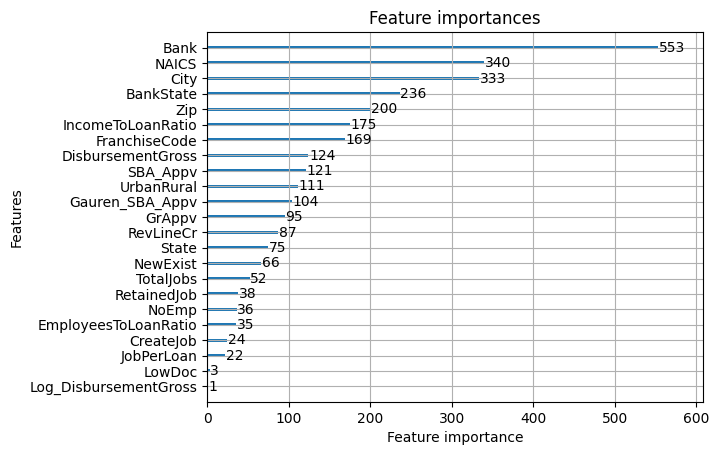

In [113]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train[:1000], y_train[:1000])
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()


In [114]:
optuna.visualization.plot_optimization_history(study)

In [115]:
optuna.visualization.plot_slice(study)

In [116]:
optuna.visualization.plot_param_importances(study)

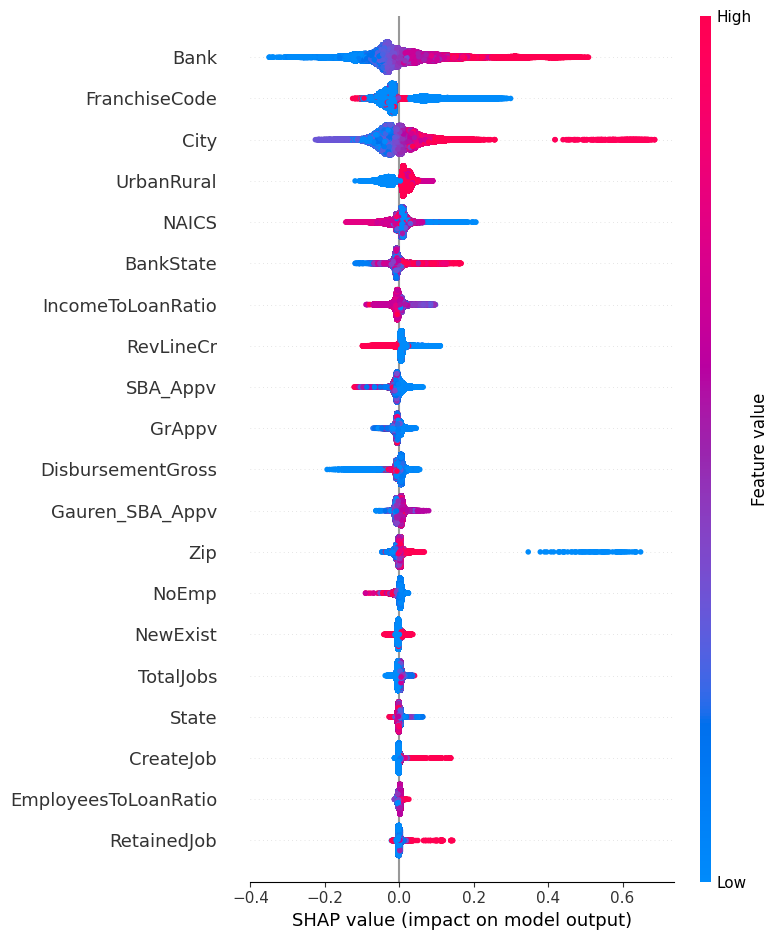

In [117]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

In [118]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [119]:
best_params


{'learning_rate': 0.6726653665151793,
 'num_leaves': 100,
 'max_depth': 12,
 'min_data_in_leaf': 100,
 'lambda_l1': 1.2370669791258075,
 'lambda_l2': 7.6858777928943045,
 'bagging_fraction': 0.9,
 'bagging_freq': 5,
 'feature_fraction': 0.8,
 'is_unbalance': True}

In [120]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.75745
	Best params:
		learning_rate: 0.6726653665151793
		num_leaves: 100
		max_depth: 12
		min_data_in_leaf: 100
		lambda_l1: 1.2370669791258075
		lambda_l2: 7.6858777928943045
		bagging_fraction: 0.9
		bagging_freq: 5
		feature_fraction: 0.8
		is_unbalance: True
Best model best_iteration: 6.8


In [121]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.6726653665151793, 'num_leaves': 100, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.2370669791258075, 'lambda_l2': 7.6858777928943045, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True, 'num_iterations': 6}


# Training the model with parameters found using Optuna

In [122]:

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

In [123]:
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))

AUC score on Test dataset: 0.7920967116934704
AUC score on Train dataset: 0.7967331478932804


In [124]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold
    
   

In [125]:
calculate_optimal_threshold(best_lgb, X_test, y_test)

0.7

In [126]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = best_lgb.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.676949632340975
Best threshold: 0.7


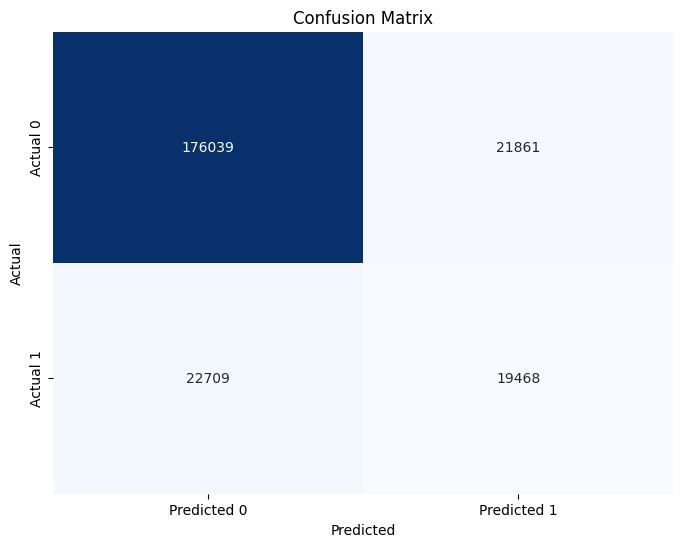

In [127]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = best_lgb.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [128]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [129]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_pred_proba = classifier.predict(X)
    
    # Set a range of thresholds to test
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    best_f1 = 0
    best_threshold = 0
    
    # Find the threshold that maximizes the F1 score
    for threshold in thresholds:
      y_pred = (y_pred_proba > threshold).astype(int)
      f1 = f1_score(y_test, y_pred, average='macro')
    
      if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    return best_threshold

In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

def train_model(df):
    """
    Train sample model and save artifacts
    """
    from sklearn.linear_model import LogisticRegression
    from optuna.integration import LightGBMPruningCallback
    import tqdm as notebook_tqdm
    from sklearn.model_selection import StratifiedKFold
    import lightgbm as lgb
    from sklearn.metrics import roc_auc_score
    import optuna
    import warnings
    import pickle
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.metrics import average_precision_score
    import numpy as np
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    
    target_col = "MIS_Status"
    cols_to_drop = ['City', 'State', 'Zip','Bank', 'BankState', 'LowDoc','RevLineCr','MIS_Status']
    # Removing the index column
    if "index" in df.columns:
        df.drop(columns="index", inplace=True)
    y = df[target_col] if target_col in df.columns else None
    X = df.drop(columns=[target_col]) if target_col in df.columns else df.copy()


    # Relacing Missing values
    
    for i in df['RevLineCr']:
      if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
        print("RevLineCr",df['RevLineCr'].unique())

    for i in df['LowDoc']:
      if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
        print("LowDoc",df['LowDoc'].unique())

    for i in df['NewExist']:
      if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
        print("NewExist",df['NewExist'].unique())


    category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in category_cols:
        df[column]=df[column].fillna(df[column].mode()[0])

    # Target encoding the categorical columns
    categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    encoder = ce.TargetEncoder(cols=categorical_columns)
    encoder.fit(df[categorical_columns], df['MIS_Status'])
    train_encoded = encoder.transform(df[categorical_columns])
    train_encoded = train_encoded.add_suffix('_trg')
    #train_encoded = pd.concat([train_encoded, data], axis=1)
    train_encoded = pd.concat([train_encoded, df], axis=1)
    for column in categorical_columns:
        train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)
    
    # Renaming the columns
    #train_encoded.rename(columns={col: col + "_trg" if col in categorical_columns else col for col in train_encoded.columns}, inplace=False)
    print(train_encoded.columns)
    


    # Adding Features
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
    train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
    train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
    train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])
    train_encoded['TotalJobs'] = train_encoded['CreateJob'] + train_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    train_encoded['IncomeToLoanRatio'] = train_encoded['DisbursementGross'] / train_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    train_encoded['EmployeesToLoanRatio'] = train_encoded['NoEmp'] / train_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    train_encoded['JobPerLoan'] = train_encoded['TotalJobs'] / train_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    train_encoded['Gauren_SBA_Appv'] = train_encoded['GrAppv'] / train_encoded['SBA_Appv']

    
    # Scaling the numerical columns
    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross',
                        'Log_DisbursementGross', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross','TotalJobs','IncomeToLoanRatio', 
                        'EmployeesToLoanRatio', 'JobPerLoan', 'Gauren_SBA_Appv']
    
    scaler = StandardScaler()
    #fit and transform separately
    scaler.fit(train_encoded[numerical_columns])
    train_encoded[numerical_columns] = scaler.transform(train_encoded[numerical_columns])

    warnings.filterwarnings("ignore", category=UserWarning)
    study_model_iteractions = {}

    def objective(trial, X, y):
     
      param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        #"max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        #'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        #'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 12
       }

      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

      cv_scores = np.empty(5)
      cv_iteractions = np.empty(5)
      for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1}, categorical_feature=categorical_columns)
        valid_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1}, categorical_feature=categorical_columns)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
      study_model_iteractions[trial.number] = np.mean(cv_iteractions)

      study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
      func = lambda trial: objective(trial, X_train, y_train)
      study.optimize(func, n_trials=200)
      print('Best hyperparameters:', study.best_params)
      print('Best AUCPR:', study.best_value)

      print(f"\tBest value (AUC): {study.best_value:.5f}")
      print(f"\tBest params:")
      plt.figure(figsize=(12,6))
      lgb.plot_importance(model, max_num_features=30)
      plt.title("Feature importances")
      plt.show()

      for key, value in study.best_params.items():
        print(f"\t\t{key}: {value}")

      print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])
      best_iterations = study_model_iteractions[study.best_trial.number] 

        
    

          
   
      # End Todo
    
      # Saving the artifacts
      artifacts_dict = {
        "model": lgb_clf,
        "target_encoder": encoder,
        "te_columns": categorical_columns,
        "columns_to_train":train_data,
        "numerical_columns":numerical_columns,
        "category_cols": category_cols,
        "scaler":scaler
          }

      #calculating threshold
      if y is not None:
        #optimal_threshold = calculate_optimal_threshold(clf_, train_encoded[columns_to_train], y)
        optimal_threshold = calculate_optimal_threshold(lgb_clf, train_encoded.columns, y)
        print(f"Optimal Threshold: {optimal_threshold}")
        # Saving the threshold in artifacts
        artifacts_dict["threshold"] = optimal_threshold

      artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/artifacts/artifacts_dict_file.pkl", "wb")
      pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)    
       
      artifacts_dict_file.close()    
      return lgb_clf

In [131]:
from IPython.core.display import display, HTML
display(HTML("<style>.output_scroll { height:auto !important; max-height: none !important; }</style>"))
pd.set_option('display.max_rows', 5000)
from sklearn.model_selection import train_test_split
        
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
target = "MIS_Status"
y = df[target]
x = df.drop(columns=[target])

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
df_train = X_train.copy()
df_train[target] = y_train
train_model(df_train)

RevLineCr ['N' 'Y' 'T' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' nan '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '1' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'R' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '`' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' 'Q' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '-' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '7' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '2' '4' '.' 'C']
RevLineCr ['N' 'Y' '4' '.' 'C']
RevLineCr ['N' 'Y' '.' 'C']
RevLineCr ['N' 'Y' 'C']
RevLineCr ['N' 'Y']
LowDoc ['N' 'Y' 'C' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' nan 'A' 'S' 'R']
LowDoc ['N' 'Y' 'A' 'S' 'R']
LowDoc ['N' 'Y' 'S' 'R']
LowDoc ['N' 'Y' 'R']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 2.0 None nan]
NewExist [1.0 

In [132]:
def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    
    if "index" in data.columns:
        data.drop(columns="index", inplace=True)
    #Load Artifacts
    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    

    clf = artifacts_dict["model"]
    te = artifacts_dict["target_encoder"]
    te_columns = artifacts_dict["te_columns"]
    columns_to_score = artifacts_dict["columns_to_train"]
    threshold = artifacts_dict["threshold"]
    category_cols = artifacts_dict["category_cols"]
    numerical_columns = artifacts_dict["numerical_columns"]
    scaler = artifacts_dict["scaler"]

     # Replacing the missing values
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)

    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)

    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    for column in category_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    
    # 10 New Feature Extractions
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    data['Log_DisbursementGross'] = np.log1p(data['DisbursementGross'])
    data['Log_GrAppv'] = np.log1p(data['GrAppv'])
    data['Log_SBA_Appv'] = np.log1p(data['SBA_Appv'])
    data['Log_BalanceGross'] = np.log1p(data['BalanceGross'])
    data['TotalJobs'] = data['CreateJob'] + data['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    data['IncomeToLoanRatio'] = data['DisbursementGross'] / data['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    data['EmployeesToLoanRatio'] = data['NoEmp'] / data['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    data['JobPerLoan'] = data['TotalJobs'] / data['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    data['Gauren_SBA_Appv'] = data['GrAppv'] / data['SBA_Appv']


    # Scaling the numerical columns
    data[numerical_columns] = scaler.transform(data[numerical_columns])                             
    
    # Target encoding the categorical columns
    data_encoded = te.transform(data[te_columns])
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    
    # Renaming the columns
    
    for column in te_columns:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    
    # Predicting the probabilities
    y_prob = clf.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index": data.index,
        "label": y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1],
        "threshold":threshold
    }
    #print(y_prob)
    return pd.DataFrame(d)

In [133]:
print(scoring(X_test))

KeyError: 'model'

In [ ]:
print(scoring(X_train))

         index  label  probability_0  probability_1  threshold
0            0      0       0.789022       0.210978   0.505051
1            1      0       0.788778       0.211222   0.505051
2            2      0       0.914288       0.085712   0.505051
3            3      0       0.592463       0.407537   0.505051
4            4      0       0.850401       0.149599   0.505051
...        ...    ...            ...            ...        ...
640199  640199      0       0.745758       0.254242   0.505051
640200  640200      0       0.819364       0.180636   0.505051
640201  640201      0       0.748059       0.251941   0.505051
640202  640202      0       0.567862       0.432138   0.505051
640203  640203      0       0.748531       0.251469   0.505051

[640204 rows x 5 columns]


In [ ]:
df2 = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2_holdout_students_valid.csv")


In [ ]:
print(scoring(df2))

       index  label  probability_0  probability_1  threshold
0          0      1       0.500004       0.499996   0.505051
1          1      0       0.736423       0.263577   0.505051
2          2      1       0.500004       0.499996   0.505051
3          3      0       0.639853       0.360147   0.505051
4          4      0       0.539377       0.460623   0.505051
...      ...    ...            ...            ...        ...
98904  98904      0       0.746682       0.253318   0.505051
98905  98905      0       0.737303       0.262697   0.505051
98906  98906      1       0.500004       0.499996   0.505051
98907  98907      1       0.500004       0.499996   0.505051
98908  98908      1       0.500004       0.499996   0.505051

[98909 rows x 5 columns]


In [ ]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [ ]:
print(scoring(df2[100:200]))

    index  label  probability_0  probability_1  threshold
0     100      0       0.852914       0.147086   0.505051
1     101      0       0.852942       0.147058   0.505051
2     102      0       0.749898       0.250102   0.505051
3     103      0       0.692439       0.307561   0.505051
4     104      0       0.819329       0.180671   0.505051
5     105      0       0.568328       0.431672   0.505051
6     106      1       0.500004       0.499996   0.505051
7     107      0       0.745293       0.254707   0.505051
8     108      0       0.852912       0.147088   0.505051
9     109      0       0.747600       0.252400   0.505051
10    110      0       0.694358       0.305642   0.505051
11    111      0       0.852914       0.147086   0.505051
12    112      0       0.746689       0.253311   0.505051
13    113      0       0.750847       0.249153   0.505051
14    114      1       0.500004       0.499996   0.505051
15    115      0       0.751205       0.248795   0.505051
16    116     